# Boston_House_ANN

## Libraries

In [ ]:
# Connect Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchsummary import summary

## Data-Visualisation & Pre-Processing

ZN: Proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: Proportion of non-retail business acres per town.

CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise).

NOX: Nitric oxides concentration (parts per 10 million).

RM: Average number of rooms per dwelling.

AGE: Proportion of owner-occupied units built prior to 1940.

DIS: Weighted distances to five Boston employment centers.

RAD: Index of accessibility to radial highways.

TAX: Full-value property-tax rate per $10,000.

PTRATIO: Pupil-teacher ratio by town.

B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

LSTAT: Percentage of lower status of the population.

MEDV: Median value of owner-occupied homes in $1000s.

In [ ]:
# Define the column names as per the dataset description
column_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]

path = '/content/drive/MyDrive/housing.csv'

# Load dataset into a DataFrame
df = pd.read_csv(path, delim_whitespace=True, header=None, names=column_names)

In [ ]:
# Display a sample of the data
df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
369,5.66998,0.0,18.10,1,0.631,6.683,96.8,1.3567,24,666.0,20.2,375.33,3.73,50.0
446,6.28807,0.0,18.10,0,0.740,6.341,96.4,2.0720,24,666.0,20.2,318.01,17.79,14.9
30,1.13081,0.0,8.14,0,0.538,5.713,94.1,4.2330,4,307.0,21.0,360.17,22.60,12.7
420,11.08740,0.0,18.10,0,0.718,6.411,100.0,1.8589,24,666.0,20.2,318.75,15.02,16.7
383,7.99248,0.0,18.10,0,0.700,5.520,100.0,1.5331,24,666.0,20.2,396.90,24.56,12.3


In [ ]:
# Shape of DataFrame
df.shape

(506, 14)

In [ ]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
# Display descriptive statistics of the DataFrame
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# Calculate the percentage of missing values in each column
print("Percentage of missing values:")
print((df.isna().sum() / df.shape[0]) * 100)

Percentage of missing values:
CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       0.0
dtype: float64


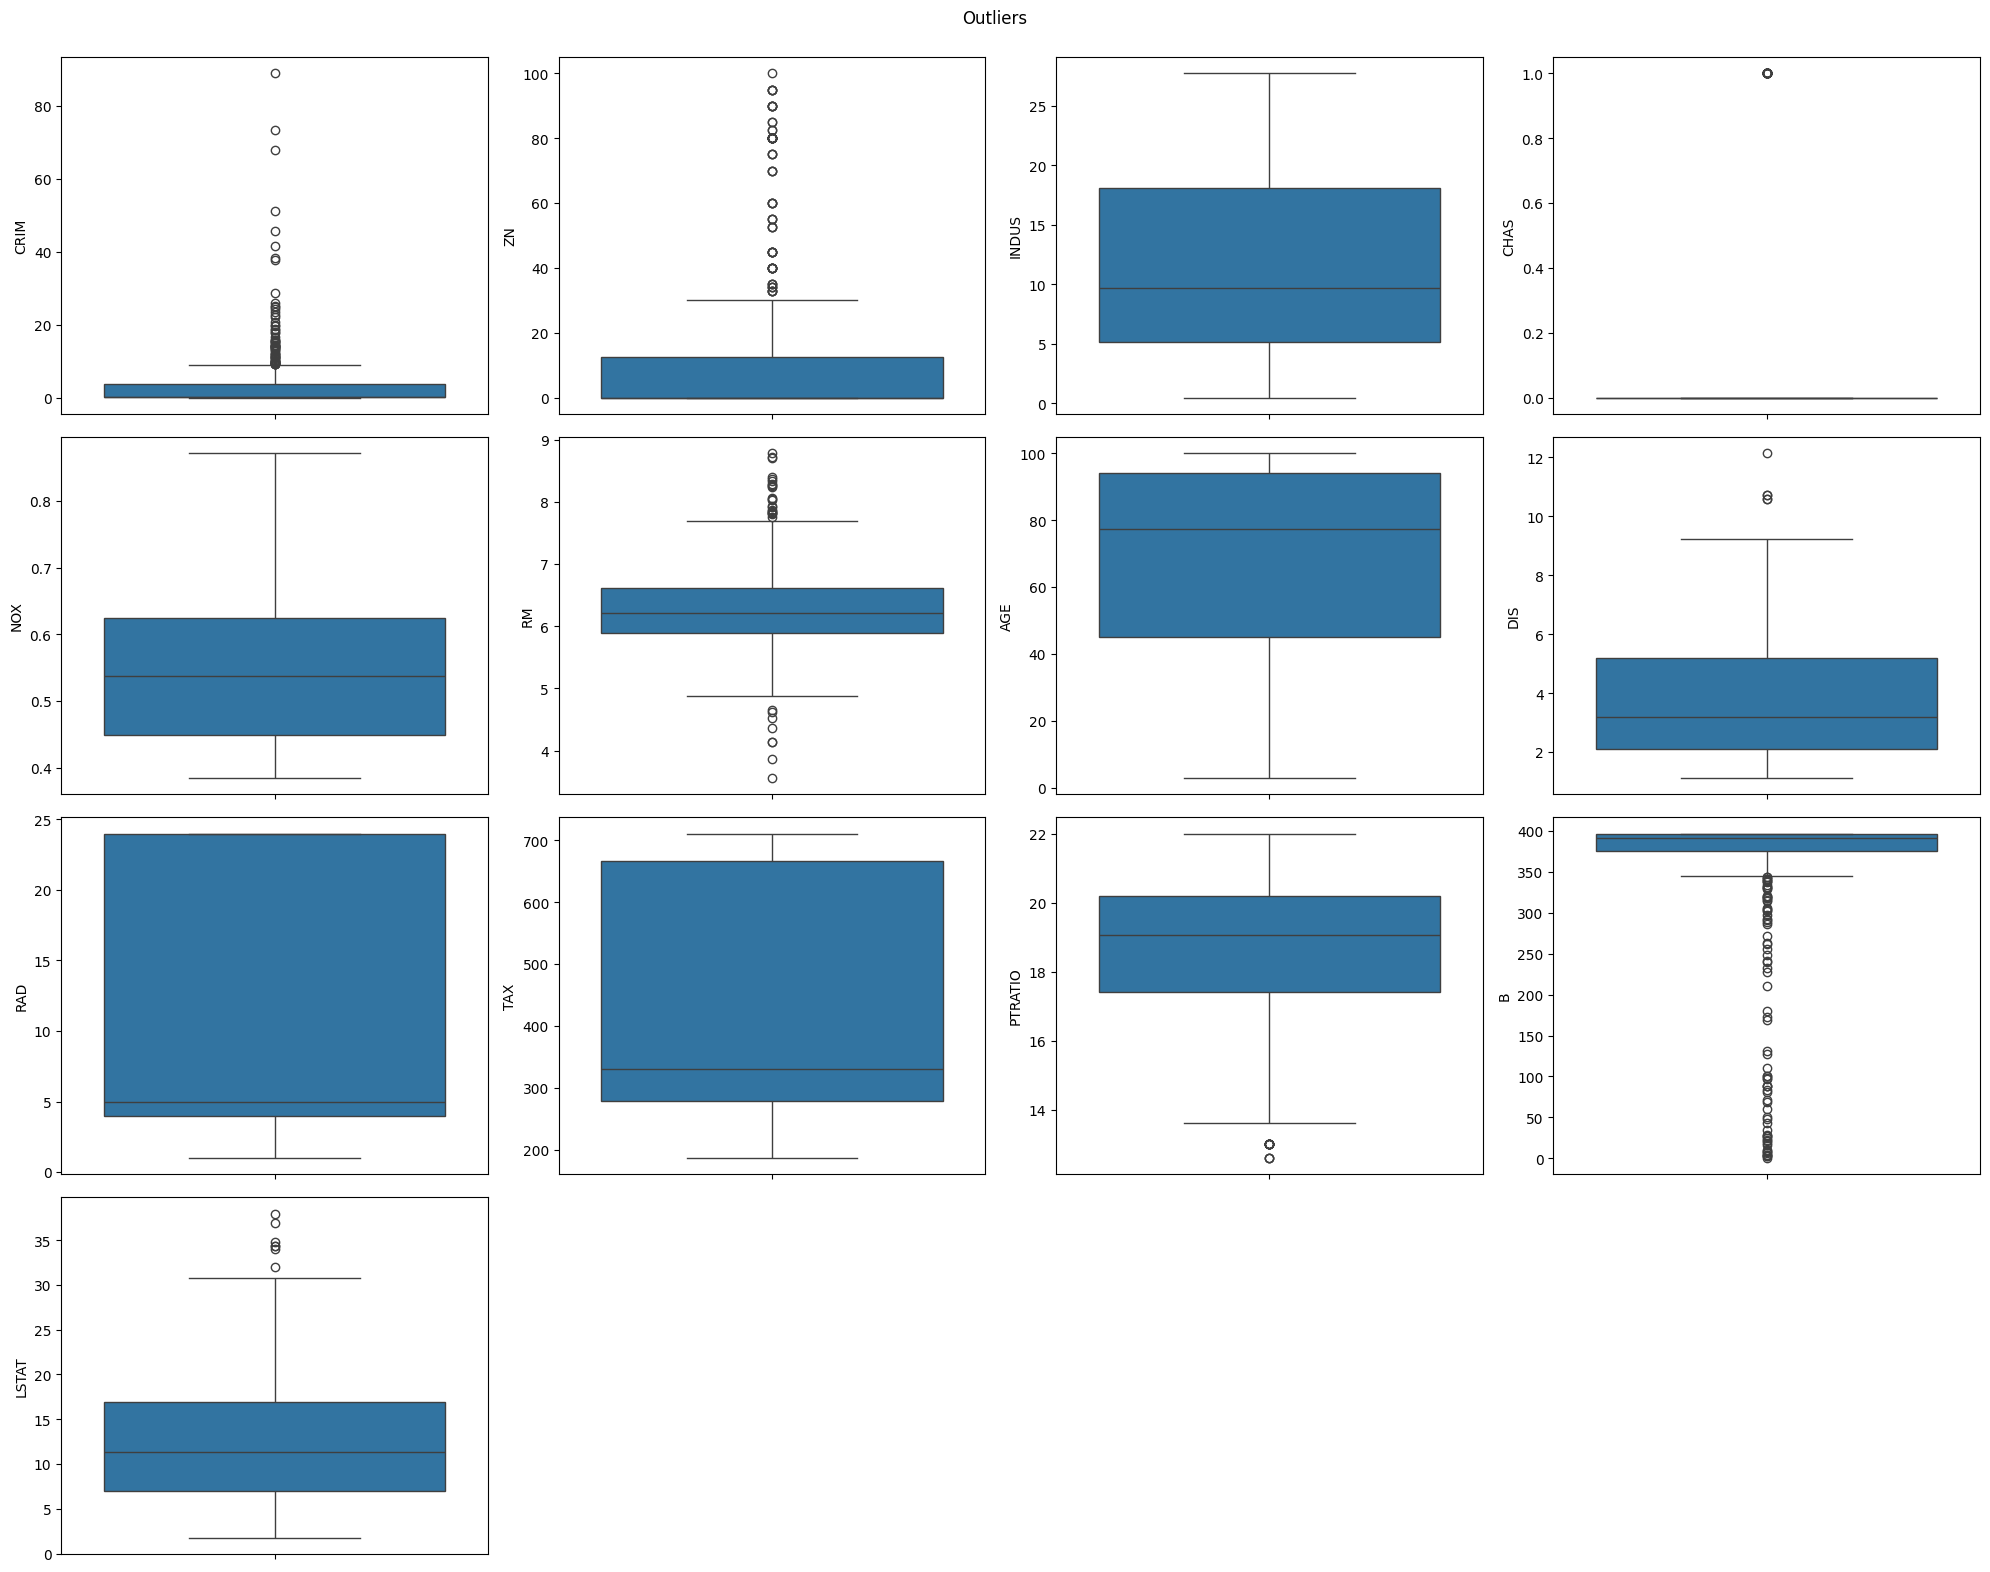

In [ ]:
# Visualize outliers using boxplots
figure, axes = plt.subplots(4, 4, figsize=(20, 16))
figure.suptitle("Outliers")

# Plot each variable
for i, col in enumerate(column_names):
    if i < 13:
        sns.boxplot(ax=axes[i // 4, i % 4], data=df, y=col)

# Remove empty subplots
figure.delaxes(axes[3][1])
figure.delaxes(axes[3][2])
figure.delaxes(axes[3][3])

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

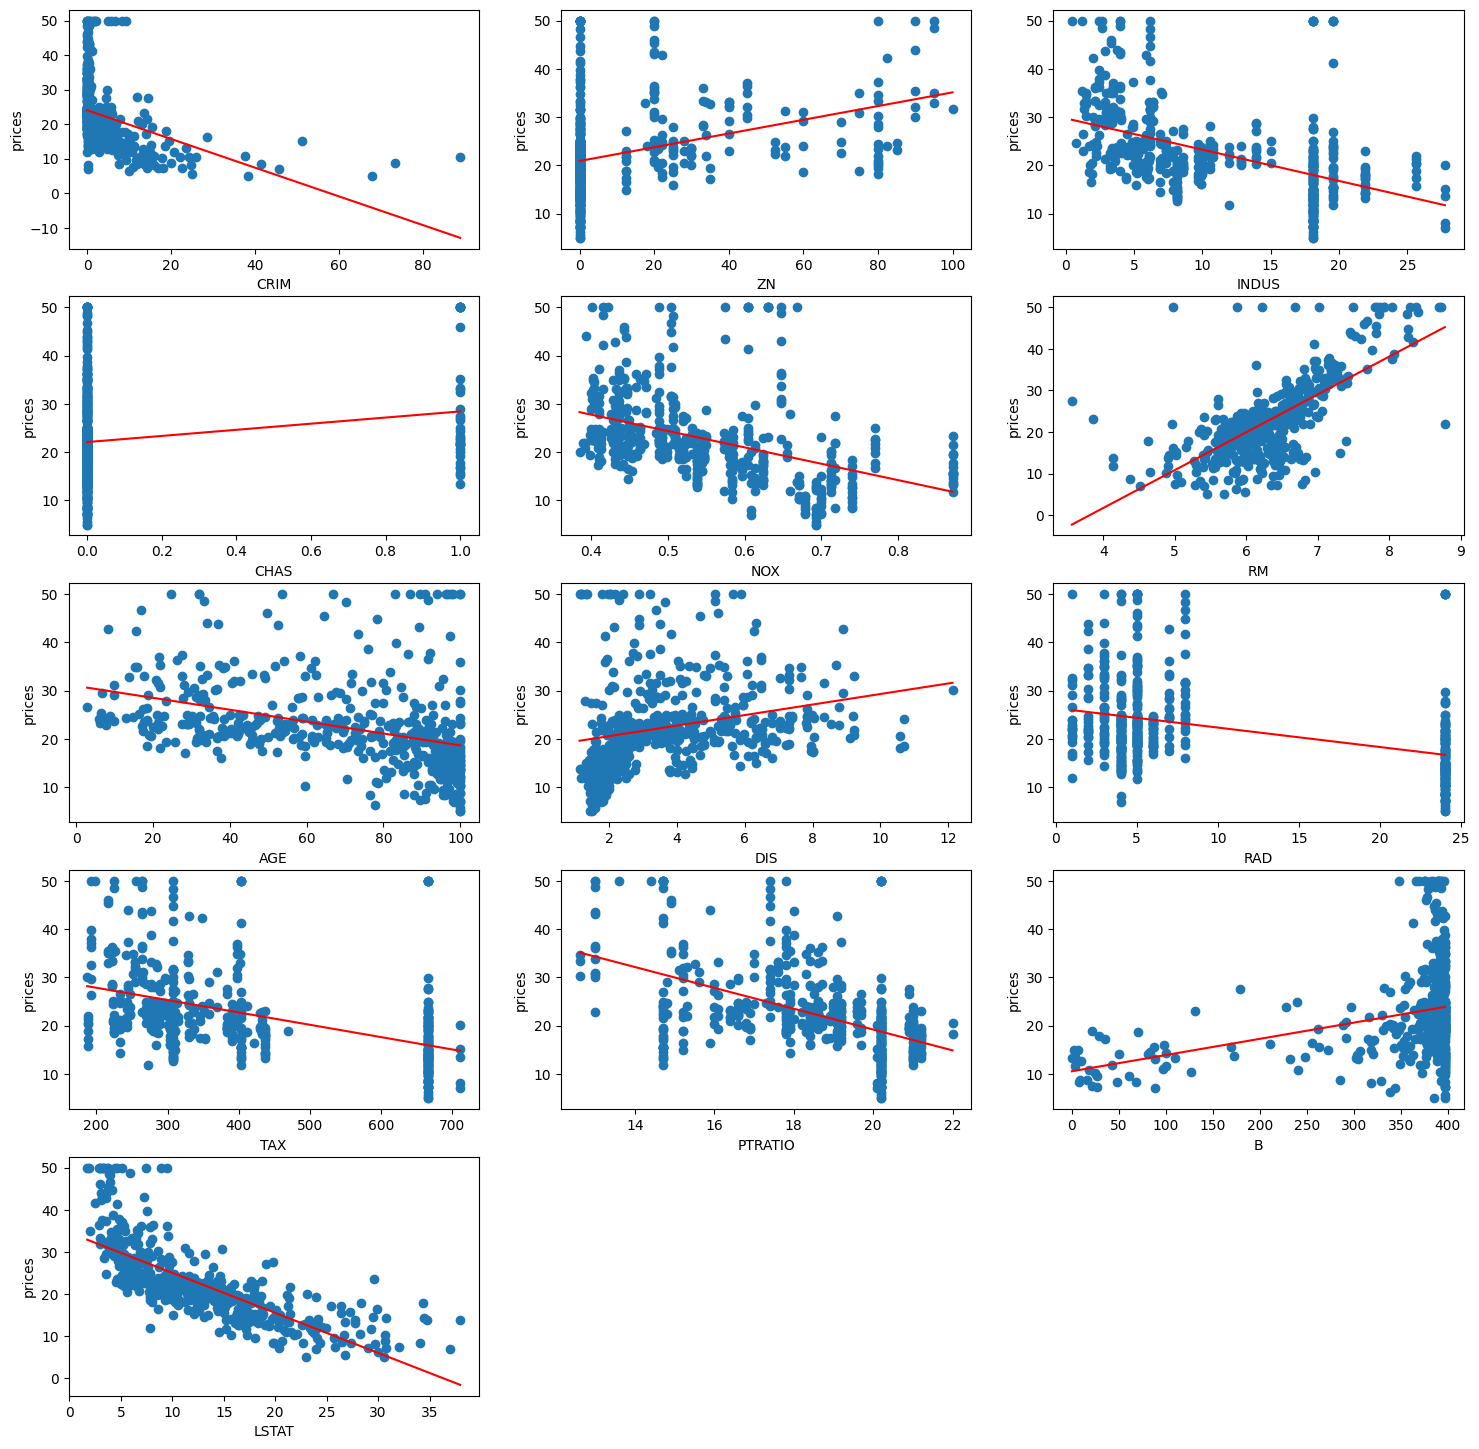

In [ ]:
'''=== Show the linear relationship between features  and price (MEDV). Thus, it provides that how the scattered
      they are and which features has more impact in prediction of house price. ==='''

# visiualize all variables  with price(MEDV)
from scipy import stats
#creates figure
plt.figure(figsize=(18, 18))

for i, col in enumerate(df.columns[0:13]): #iterates over all columns except for price column (last one)
    plt.subplot(5, 3, i+1) # each row three figure
    x = df[col] #x-axis
    y = df['MEDV'] #y-axis
    plt.plot(x, y, 'o')

    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1)) (np.unique(x)), color='red')
    plt.xlabel(col) # x-label
    plt.ylabel('prices') # y-label

In [ ]:
# Convert DataFrame to numpy array
data = df.to_numpy()

In [ ]:
# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(data[:, :-1], data[:, -1], test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# Scale features using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
# Check for GPU availability
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
X_val = torch.tensor(X_val, dtype=torch.float32).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1).to(device)
y_val = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1).to(device)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1).to(device)

In [ ]:
# Create PyTorch datasets and dataloaders
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

## Explicit EarlyStopping

In [ ]:
class EarlyStopping:
    def __init__(self, patience=7, verbose=False, delta=0):
        self.patience = patience
        self.verbose = verbose
        self.delta = delta
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf

    def __call__(self, val_loss):
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.counter = 0

## Model-Architecture

In [ ]:
# Define the architecture of the neural network model
class ANNModel(nn.Module):
    def __init__(self, input_features, output_features):
        super(ANNModel, self).__init__()
        self.linear_relu_stack = nn.Sequential(
          nn.Linear(input_features, 64),
          nn.Dropout(0.2),
          nn.ReLU(),
          nn.Linear(64, 64),
          nn.Dropout(0.2),
          nn.ReLU(),
          nn.Linear(64, 32),
          nn.Dropout(0.2),
          nn.ReLU(),
          nn.Linear(32, output_features),
        )

    def forward(self, x):
        return self.linear_relu_stack(x)

In [ ]:
# Initialize the model
model = ANNModel(input_features = X_train.shape[1], output_features = 1).to(device)

# Define loss function, optimizer, and learning rate scheduler
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

In [ ]:
# Display the model architecture
model

ANNModel(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=13, out_features=64, bias=True)
    (1): Dropout(p=0.2, inplace=False)
    (2): ReLU()
    (3): Linear(in_features=64, out_features=64, bias=True)
    (4): Dropout(p=0.2, inplace=False)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): Dropout(p=0.2, inplace=False)
    (8): ReLU()
    (9): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [ ]:
# model summary
summary(model, input_size=(1, 13))

##Model-Training

In [ ]:
# Set random seeds for reproducibility
torch.manual_seed(42)
if device == "cuda":
    torch.cuda.manual_seed(42)

In [ ]:
# Training loop
train_losses = []
val_losses = []

early_stopping = EarlyStopping(patience=5, verbose=True)

epochs = 500
for epoch in range(epochs):
  model.train()
  running_loss = 0.0

  for X_batch, y_batch in train_loader:
    y_pred = model(X_batch)

    loss = loss_fn(y_pred, y_batch)
    running_loss += loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_losses.append(running_loss / len(train_loader))

  model.eval()
  with torch.inference_mode():
    y_val_pred = model(X_val)
    loss = loss_fn(y_val_pred, y_val)

  val_losses.append(loss.item())

  if epoch % 10 == 0:
      print(f"Epoch: {epoch}, Loss: {train_losses[-1]}, Val Loss: {val_losses[-1]}")

  scheduler.step()

  early_stopping(val_losses[-1])
  if early_stopping.early_stop:
    print("Early stopping")
    break

Epoch: 0, Loss: 641.0790379842123, Val Loss: 490.2373962402344
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
Epoch: 10, Loss: 62.318617502848305, Val Loss: 27.357271194458008
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
Epoch: 20, Loss: 50.469948291778564, Val Loss: 14.950699806213379
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
Epoch: 30, Loss: 37.040650675694145, Val Loss: 12.034343719482422
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 1 out of 5
Epoch: 40, Loss: 44.80136505762736, Val Loss: 11.384041786193848
EarlyStopping counter: 1 out of 5
EarlyStopping counter: 2 out of 5
EarlyStopping counter: 3 out of 5
EarlyStopping counter: 4 out of 5
EarlyStopping counter: 5 out of 5
Early stopping


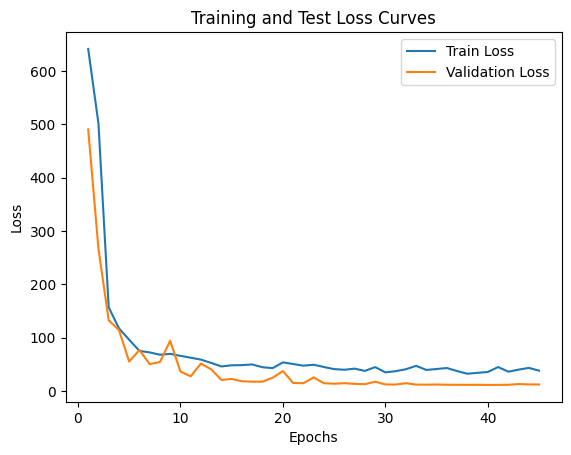

In [ ]:
# Plot the loss curves
plt.plot(range(1, len(train_losses)+1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses)+1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curves')
plt.legend()
plt.show()

##Model-Evaluation

In [ ]:
# Evaluate on test data
model.eval()
with torch.inference_mode():
  y_test_pred = model(X_test)
  loss = loss_fn(y_test_pred, y_test)

print(f"Test Loss: {loss}")

Test Loss: 28.180734634399414


In [ ]:
y_test_pred = y_test_pred.cpu().detach().numpy().flatten()
y_test = y_test.cpu().detach().numpy().flatten()

In [ ]:
# show the true value and predicted value in dataframe
true_predicted = pd.DataFrame(list(zip(y_test, y_test_pred)),
                    columns=['True Value','Predicted Value'])
true_predicted.sample(10)

,True Value,Predicted Value
27,16.400000,16.371469
38,21.200001,19.799828
36,37.900002,31.468355
75,20.799999,16.988569
58,10.900000,15.613226
35,18.900000,18.723608
59,17.200001,17.739307
74,20.600000,19.807692
41,20.400000,20.522306
51,20.100000,18.619865


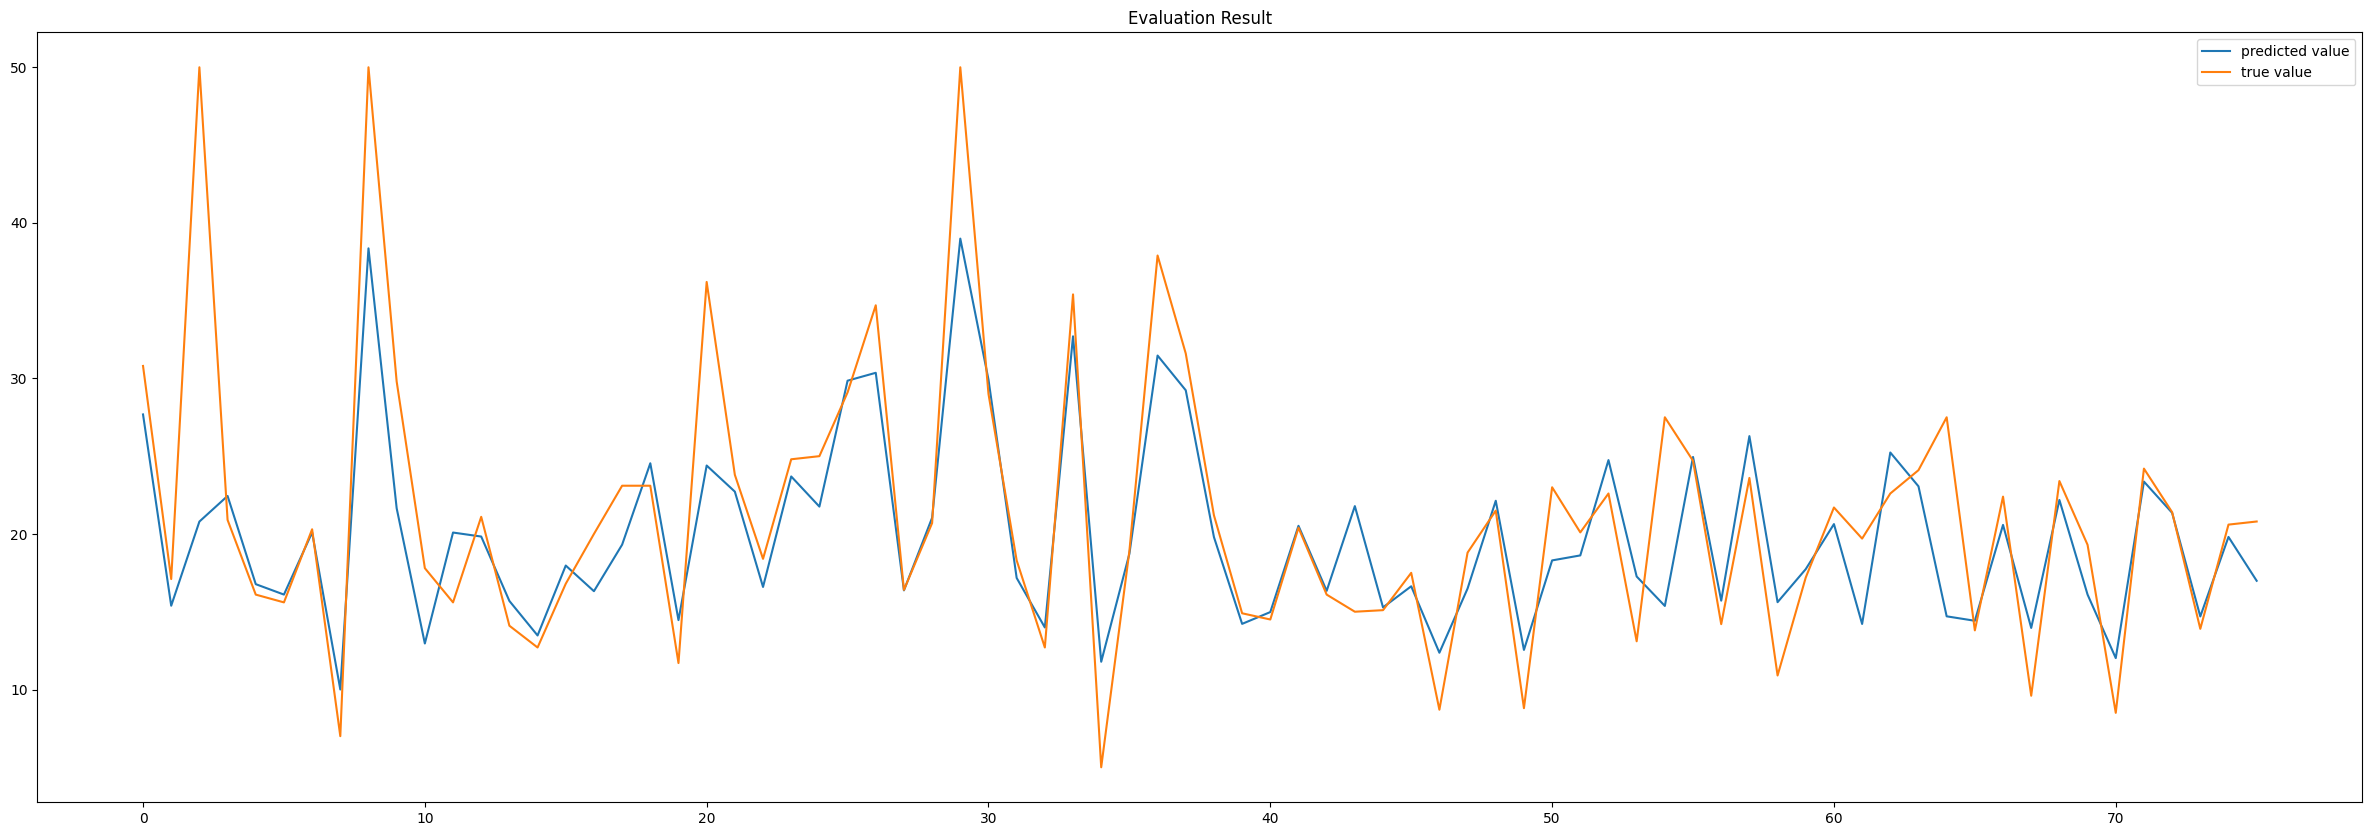

In [ ]:
#visiulize the true value with predicted value (using line graph)
x = y_test_pred
y = y_test
plt.figure(figsize=(30,10))
plt.plot(x, label='predicted value')
plt.plot(y, label='true value')
plt.title('Evaluation Result')
plt.legend()
plt.show()

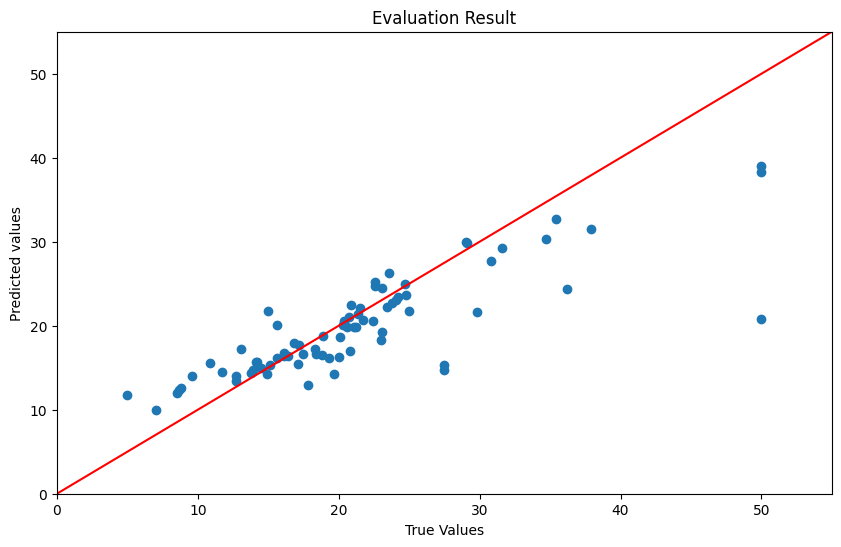

In [ ]:
'''=== Visualize the model evaluation skill ==='''

# visualize the prediction uisng diagonal line
y = y_test_pred#y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()

##Outliers-Handling

In [ ]:
#calcualtes quartiles and interquaterlies
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
data = df.iloc[:,0:14]
data.shape

(506, 14)

In [ ]:
#data after outliers remvoing
clean_data = df[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
clean_data.shape

(268, 14)

* Here as 50% of the data was removed I see no point in continuing this case